In [1]:
#import warning
#warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd    
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import relativedelta
pd.set_option('display.max_columns', None)

In [2]:
loan_data = pd.read_csv('lending_club_loans.csv')
#loan_data['loan_bal'] = loan_data['funded_amnt'] - loan_data['loan_bal'] - loan_data['loan_bal']
loan_data = loan_data[["id", "member_id", "loan_amnt", "issue_d", "term", "last_pymnt_d", "earliest_cr_line", "last_credit_pull_d", "loan_status"]]
loan_data['term'] = loan_data['term'].str.replace(' months', '')
loan_data['term'] = loan_data['term'].astype(int)


In [3]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  39786 non-null  int64 
 1   member_id           39786 non-null  int64 
 2   loan_amnt           39786 non-null  int64 
 3   issue_d             39786 non-null  object
 4   term                39786 non-null  int32 
 5   last_pymnt_d        39715 non-null  object
 6   earliest_cr_line    39786 non-null  object
 7   last_credit_pull_d  39784 non-null  object
 8   loan_status         39786 non-null  object
dtypes: int32(1), int64(3), object(5)
memory usage: 2.6+ MB


In [165]:
# Below are some Quick examples.
# Create a pandas DataFrame.
import pandas as pd
import numpy as np
technologies= {
    'Courses':["Spark","PySpark","Spark","Python","PySpark","Java"],
    'Fee' :[22000,25000,np.nan,np.nan,np.nan,np.nan],
    'Duration':['30days',np.nan,'30days','N/A', np.nan,np.nan]
          }
df = pd.DataFrame(technologies)

# Using DataFrame.dropna() method drop all rows that have NAN/none.
df2=df.dropna()

# Filter out NAN data selection column by DataFrame.dropna().
df2 = df.dropna(thresh=2)

# Pandas find columns with nan to update.
df2=df[df.Duration.notnull()]

# Drop rows that has all NaN values.
df2=df.dropna(how='all')

# Using reset_index() Method.
df2=df.dropna().reset_index(drop=True)

# Two columns by using subset parameter.
df2=df.dropna(subset=['Courses','Fee'])

# Filter NAN Data selection column of strings by not operator.
df2 = df[~pd.isnull(df['Courses'])]

In [4]:
df = loan_data[loan_data.last_pymnt_d.isna()]
df

,id,member_id,loan_amnt,issue_d,term,last_pymnt_d,earliest_cr_line,last_credit_pull_d,loan_status
26,1069800,1304679,15000,Dec-11,36,NaN,Oct-03,Jan-17,Charged Off
2731,1032519,1262161,8000,Nov-11,36,NaN,Nov-97,Jan-17,Charged Off
3625,1016039,1243723,6400,Nov-11,60,NaN,Jun-06,Oct-16,Charged Off
3998,1009833,1236591,18000,Nov-11,60,NaN,Aug-08,Jan-17,Charged Off
4220,1006579,1232989,1800,Nov-11,36,NaN,Oct-98,Jan-17,Charged Off
...,...,...,...,...,...,...,...,...,...
36254,419505,492244,20000,Jul-09,36,NaN,Jun-99,Oct-16,Charged Off
36275,417817,487349,7800,Jun-09,36,NaN,Mar-83,Jan-17,Charged Off
36278,418546,488538,2000,Jun-09,36,NaN,Nov-99,Oct-16,Charged Off
37006,392751,429885,25000,Apr-09,36,NaN,Nov-94,Jun-09,Charged Off


In [5]:
loan_data = loan_data.dropna()
df = loan_data[loan_data.last_pymnt_d.isna()]
df

,id,member_id,loan_amnt,issue_d,term,last_pymnt_d,earliest_cr_line,last_credit_pull_d,loan_status


In [112]:
mapping_dict = {
        'Jan': '01',
        'Feb': '02',
        'Mar': '03',
        'Apr': '04',
        'May': '05',
        'Jun': '06',
        'Jul': '07',
        'Aug': '08',
        'Sep': '09',
        'Oct': '10',
        'Nov': '11',
        'Dec': '12'
}

import re
def convert_date(text):           #Convert str to lowercase
    text = re.sub("-","20",text)
    text = re.sub("[^a-zA-Z0-9/s]"," ",text)   #or ...,str(text)) if error
    text = re.sub("/s+"," ",text)   #dấu câu
    text = re.sub(' ', '20', text)
    text = re.sub('Jan', '01', text)
    text = re.sub('Feb', '02', text)
    text = re.sub('Mar', '03', text)
    text = re.sub('Apr', '04', text)
    text = re.sub('May', '05', text)
    text = re.sub('Jun', '06', text)
    text = re.sub('Jul', '07', text)
    text = re.sub('Aug', '08', text)
    text = re.sub('Sep', '09', text)
    text = re.sub('Oct', '10', text)
    text = re.sub('Nov', '11', text)
    text = re.sub('Dec', '12', text)
    tex = datetime.strptime(text,'%m%Y')
    #tex = tex.month()
    #text = datetime(text, '%Y-%m')
    #text = text.str.replace(mapping_dict)
    return tex

a = loan_data['issue_d'].apply(convert_date)
print(a)

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
           ...    
39781   2007-07-01
39782   2007-07-01
39783   2007-07-01
39784   2007-07-01
39785   2007-06-01
Name: issue_d, Length: 39786, dtype: datetime64[ns]


In [6]:
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')
loan_data['last_credit_pull_d'] = pd.to_datetime(loan_data['last_credit_pull_d'], format = '%b-%y')
loan_data['last_pymnt_d'] = pd.to_datetime(loan_data['last_pymnt_d'], format = '%b-%y')
loan_data.head(3) 

,id,member_id,loan_amnt,issue_d,term,last_pymnt_d,earliest_cr_line,last_credit_pull_d,loan_status
0,1077501,1296599,5000,2011-12-01,36,2015-01-01,1985-01-01,2017-01-01,Fully Paid
1,1077430,1314167,2500,2011-12-01,60,2013-04-01,1999-04-01,2016-10-01,Charged Off
2,1077175,1313524,2400,2011-12-01,36,2014-06-01,2001-11-01,2017-01-01,Fully Paid


In [7]:
loan_data['months_paid'] = round(((loan_data['last_pymnt_d'] - loan_data['issue_d'])/np.timedelta64(1, 'M')), 0)
loan_data.head(3) 

,id,member_id,loan_amnt,issue_d,term,last_pymnt_d,earliest_cr_line,last_credit_pull_d,loan_status,months_paid
0,1077501,1296599,5000,2011-12-01,36,2015-01-01,1985-01-01,2017-01-01,Fully Paid,36.0
1,1077430,1314167,2500,2011-12-01,60,2013-04-01,1999-04-01,2016-10-01,Charged Off,16.0
2,1077175,1313524,2400,2011-12-01,36,2014-06-01,2001-11-01,2017-01-01,Fully Paid,29.0


In [8]:
loan_data['months_paid'] = loan_data['months_paid'].astype(int, errors='ignore')
loan_data.head(3)

,id,member_id,loan_amnt,issue_d,term,last_pymnt_d,earliest_cr_line,last_credit_pull_d,loan_status,months_paid
0,1077501,1296599,5000,2011-12-01,36,2015-01-01,1985-01-01,2017-01-01,Fully Paid,36
1,1077430,1314167,2500,2011-12-01,60,2013-04-01,1999-04-01,2016-10-01,Charged Off,16
2,1077175,1313524,2400,2011-12-01,36,2014-06-01,2001-11-01,2017-01-01,Fully Paid,29


In [9]:
loan_data['loan_status'].value_counts()

loan_status
Fully Paid            34107
Charged Off            5590
Late (31-120 days)       10
Current                   3
Late (16-30 days)         1
In Grace Period           1
Default                   1
Name: count, dtype: int64

In [10]:
loan_data_defaults = loan_data.loc[loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                    'Does not meet the credit policy. Status:Charged Off',
                                                    'Late (31-120 days)'])]
loan_data_defaults

,id,member_id,loan_amnt,issue_d,term,last_pymnt_d,earliest_cr_line,last_credit_pull_d,loan_status,months_paid
1,1077430,1314167,2500,2011-12-01,60,2013-04-01,1999-04-01,2016-10-01,Charged Off,16
8,1071795,1306957,5600,2011-12-01,60,2012-04-01,2004-04-01,2016-10-01,Charged Off,4
9,1071570,1306721,5375,2011-12-01,60,2012-11-01,2004-09-01,2016-12-01,Charged Off,11
12,1064687,1298717,9000,2011-12-01,36,2012-07-01,2004-04-01,2016-10-01,Charged Off,7
14,1069057,1303503,10000,2011-12-01,36,2013-10-01,1991-05-01,2016-10-01,Charged Off,22
...,...,...,...,...,...,...,...,...,...,...
39736,118823,118026,2500,2007-08-01,36,2010-03-01,1992-07-01,2017-01-01,Charged Off,30
39737,118533,117783,2500,2007-08-01,36,2010-03-01,1994-02-01,2017-01-01,Charged Off,30
39738,118523,118519,6500,2007-08-01,36,2009-02-01,1990-07-01,2017-01-01,Charged Off,18
39747,113179,113093,1000,2007-08-01,36,2009-05-01,2004-07-01,2016-10-01,Charged Off,21


In [11]:
loan_data.last_pymnt_d

0       2015-01-01
1       2013-04-01
2       2014-06-01
3       2015-01-01
4       2017-01-01
           ...    
39781   2010-07-01
39782   2010-07-01
39783   2008-04-01
39784   2008-01-01
39785   2010-06-01
Name: last_pymnt_d, Length: 39713, dtype: datetime64[ns]

In [12]:
loan_data_defaults.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5601 entries, 1 to 39757
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  5601 non-null   int64         
 1   member_id           5601 non-null   int64         
 2   loan_amnt           5601 non-null   int64         
 3   issue_d             5601 non-null   datetime64[ns]
 4   term                5601 non-null   int32         
 5   last_pymnt_d        5601 non-null   datetime64[ns]
 6   earliest_cr_line    5601 non-null   datetime64[ns]
 7   last_credit_pull_d  5601 non-null   datetime64[ns]
 8   loan_status         5601 non-null   object        
 9   months_paid         5601 non-null   int32         
dtypes: datetime64[ns](4), int32(2), int64(3), object(1)
memory usage: 437.6+ KB


In [13]:
#loan_data_defaults['default_months'] = (loan_data['term'] - loan_data['months_paid'])
#loan_data['term'] - loan_data['months_paid']
#loan_data_defaults['default_months']  = loan_data_defaults.apply(lambda x: x['term'] - x['months_paid'], axis=1)
loan_data_defaults.loc[:, 'default_months'] = loan_data_defaults.apply(lambda x: x['term'] - x['months_paid'], axis=1)
loan_data_defaults.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8128\3234597532.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults.loc[:, 'default_months'] = loan_data_defaults.apply(lambda x: x['term'] - x['months_paid'], axis=1)


,id,member_id,loan_amnt,issue_d,term,last_pymnt_d,earliest_cr_line,last_credit_pull_d,loan_status,months_paid,default_months
1,1077430,1314167,2500,2011-12-01,60,2013-04-01,1999-04-01,2016-10-01,Charged Off,16,44
8,1071795,1306957,5600,2011-12-01,60,2012-04-01,2004-04-01,2016-10-01,Charged Off,4,56
9,1071570,1306721,5375,2011-12-01,60,2012-11-01,2004-09-01,2016-12-01,Charged Off,11,49
12,1064687,1298717,9000,2011-12-01,36,2012-07-01,2004-04-01,2016-10-01,Charged Off,7,29
14,1069057,1303503,10000,2011-12-01,36,2013-10-01,1991-05-01,2016-10-01,Charged Off,22,14


In [14]:
loan_data_defaults.loc[:, 'origination_qtr'] = loan_data_defaults['issue_d'].dt.quarter
loan_data_defaults.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8128\2976312661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults.loc[:, 'origination_qtr'] = loan_data_defaults['issue_d'].dt.quarter


,id,member_id,loan_amnt,issue_d,term,last_pymnt_d,earliest_cr_line,last_credit_pull_d,loan_status,months_paid,default_months,origination_qtr
1,1077430,1314167,2500,2011-12-01,60,2013-04-01,1999-04-01,2016-10-01,Charged Off,16,44,4
8,1071795,1306957,5600,2011-12-01,60,2012-04-01,2004-04-01,2016-10-01,Charged Off,4,56,4
9,1071570,1306721,5375,2011-12-01,60,2012-11-01,2004-09-01,2016-12-01,Charged Off,11,49,4
12,1064687,1298717,9000,2011-12-01,36,2012-07-01,2004-04-01,2016-10-01,Charged Off,7,29,4
14,1069057,1303503,10000,2011-12-01,36,2013-10-01,1991-05-01,2016-10-01,Charged Off,22,14,4


In [15]:
loan_data_defaults.loc[:, 'origination_yr']  =  loan_data_defaults['issue_d'].dt.year
loan_data_defaults.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8128\1685660240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults.loc[:, 'origination_yr']  =  loan_data_defaults['issue_d'].dt.year


,id,member_id,loan_amnt,issue_d,term,last_pymnt_d,earliest_cr_line,last_credit_pull_d,loan_status,months_paid,default_months,origination_qtr,origination_yr
1,1077430,1314167,2500,2011-12-01,60,2013-04-01,1999-04-01,2016-10-01,Charged Off,16,44,4,2011
8,1071795,1306957,5600,2011-12-01,60,2012-04-01,2004-04-01,2016-10-01,Charged Off,4,56,4,2011
9,1071570,1306721,5375,2011-12-01,60,2012-11-01,2004-09-01,2016-12-01,Charged Off,11,49,4,2011
12,1064687,1298717,9000,2011-12-01,36,2012-07-01,2004-04-01,2016-10-01,Charged Off,7,29,4,2011
14,1069057,1303503,10000,2011-12-01,36,2013-10-01,1991-05-01,2016-10-01,Charged Off,22,14,4,2011


In [16]:
loan_data_defaults.loc[:,'origination'] = loan_data_defaults['origination_yr'].astype(str) + '_' + loan_data_defaults['origination_qtr'].astype(str)
loan_data_defaults.head()
#Phải đổi năm lên trước vd: 2011_1
# loan_data_defaults.loc[:,'origination'] = loan_data_defaults['origination_yr'].astype(str) + '_' + loan_data_defaults['origination_qtr'].astype(str)


C:\Users\Admin\AppData\Local\Temp\ipykernel_8128\2018259294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults.loc[:,'origination'] = loan_data_defaults['origination_yr'].astype(str) + '_' + loan_data_defaults['origination_qtr'].astype(str)


,id,member_id,loan_amnt,issue_d,term,last_pymnt_d,earliest_cr_line,last_credit_pull_d,loan_status,months_paid,default_months,origination_qtr,origination_yr,origination
1,1077430,1314167,2500,2011-12-01,60,2013-04-01,1999-04-01,2016-10-01,Charged Off,16,44,4,2011,2011_4
8,1071795,1306957,5600,2011-12-01,60,2012-04-01,2004-04-01,2016-10-01,Charged Off,4,56,4,2011,2011_4
9,1071570,1306721,5375,2011-12-01,60,2012-11-01,2004-09-01,2016-12-01,Charged Off,11,49,4,2011,2011_4
12,1064687,1298717,9000,2011-12-01,36,2012-07-01,2004-04-01,2016-10-01,Charged Off,7,29,4,2011,2011_4
14,1069057,1303503,10000,2011-12-01,36,2013-10-01,1991-05-01,2016-10-01,Charged Off,22,14,4,2011,2011_4


In [17]:
loan_data_defaults = loan_data_defaults.drop(['origination_yr', 'origination_qtr'], axis=1)
loan_data_defaults.head()

,id,member_id,loan_amnt,issue_d,term,last_pymnt_d,earliest_cr_line,last_credit_pull_d,loan_status,months_paid,default_months,origination
1,1077430,1314167,2500,2011-12-01,60,2013-04-01,1999-04-01,2016-10-01,Charged Off,16,44,2011_4
8,1071795,1306957,5600,2011-12-01,60,2012-04-01,2004-04-01,2016-10-01,Charged Off,4,56,2011_4
9,1071570,1306721,5375,2011-12-01,60,2012-11-01,2004-09-01,2016-12-01,Charged Off,11,49,2011_4
12,1064687,1298717,9000,2011-12-01,36,2012-07-01,2004-04-01,2016-10-01,Charged Off,7,29,2011_4
14,1069057,1303503,10000,2011-12-01,36,2013-10-01,1991-05-01,2016-10-01,Charged Off,22,14,2011_4


In [18]:
loan_data_defaults = loan_data_defaults[loan_data_defaults['default_months'] >= 0]

In [19]:
vint_table = pd.pivot_table(loan_data_defaults,
                index='origination',
                columns=['months_paid'],
                values='loan_amnt',
                aggfunc='sum',
                fill_value=0)

In [20]:
vint_table

months_paid,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
origination,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007_3,0,0,0,0,0,0,3175,0,0,0,0,0,0,0,0,0,0,8625,0,20000,1000,0,0,0,0,15450,8000,0,0,25000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2007_4,0,0,0,0,0,0,21225,2100,6800,52700,25000,0,25000,51000,45000,21000,0,27000,22350,13975,5000,14400,0,4650,0,10725,13600,21000,8275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2008_1,0,0,10100,33525,39300,46500,80500,23000,71000,56000,67200,19275,8000,38500,56500,42850,60200,50000,49850,19600,78600,71850,26750,93600,48925,0,19950,32200,25000,10000,14700,12200,19000,15000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2008_2,7500,17500,7500,7500,0,7500,0,12550,0,41900,7500,40000,23800,47700,50000,10000,22675,6000,0,0,11100,46100,9525,7500,10000,0,10000,7500,20000,0,7500,0,6825,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2008_3,5000,0,14000,0,0,6000,22900,0,7500,15500,0,1500,15000,28500,15000,7500,0,6000,15000,7500,7500,12000,6000,7000,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2008_4,2450,8550,39000,59700,41250,27950,9000,95000,47000,10000,18500,51000,40000,7500,27800,27150,71000,41500,37400,14000,9000,15600,16900,10800,13500,12000,2000,2400,12500,0,14500,19500,24000,5000,0,2400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2009_1,0,23000,61500,71425,46000,13500,30000,38500,31775,27000,40500,21250,0,33725,14000,39000,26125,41000,59800,22600,21200,18000,15000,57475,17500,25000,24400,12000,6950,27000,0,26000,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2009_2,20000,15700,26600,95450,50450,42600,71750,31750,52850,48850,35500,35500,65400,42100,37200,83500,47250,41000,101000,99050,41000,0,0,0,37000,14000,39800,21200,7600,6000,6000,17500,28000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2009_3,26000,35000,33875,85000,37900,30000,79775,31425,42550,51300,56250,84100,20000,94000,35250,41800,46475,35250,41600,59000,26800,33500,95450,64200,23200,88550,66775,11000,22400,12000,17075,0,17300,0,4000,8000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Cumulative % Months Past Due')

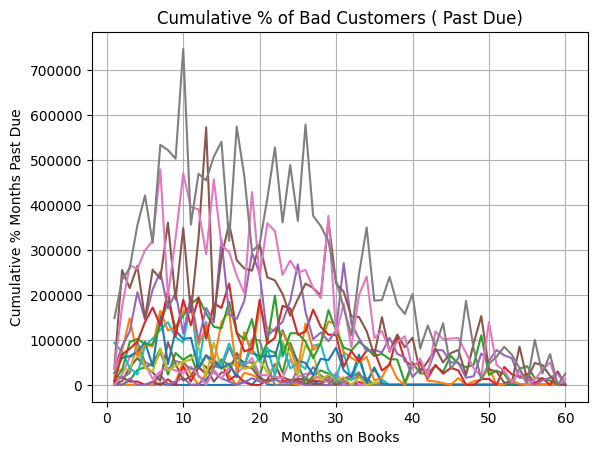

In [21]:
# plot vintage line chart
plt.rcParams['figure.facecolor'] = 'white'
vintage0 = vint_table.replace(0,np.nan)
lst = [i for i in range(1,61)]
vint_table[lst].T.plot(legend = False, grid = True, title = 'Cumulative % of Bad Customers ( Past Due)')
plt.xlabel('Months on Books')
plt.ylabel('Cumulative % Months Past Due')

## Roll rate analysis 

In [23]:
roll_rates = loan_data_defaults.groupby(['origination'])['default_months'].value_counts(normalize=True).unstack()
roll_rates

default_months,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
origination,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007_3,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,NaN,NaN,0.100000,0.100000,NaN,NaN,NaN,NaN,0.100000,0.100000,NaN,0.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030303,0.060606,0.060606,0.060606,NaN,0.030303,NaN,0.030303,0.030303,0.060606,0.030303,0.060606,NaN,0.060606,0.060606,0.090909,0.030303,NaN,0.030303,0.121212,0.030303,0.030303,0.090909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008_1,NaN,NaN,0.010526,0.021053,0.021053,0.010526,0.010526,0.010526,0.031579,0.021053,NaN,0.063158,0.073684,0.031579,0.063158,0.063158,0.021053,0.042105,0.042105,0.031579,0.042105,0.042105,0.021053,0.010526,0.010526,0.042105,0.052632,0.042105,0.021053,0.052632,0.031579,0.031579,0.021053,0.010526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008_2,NaN,NaN,NaN,0.022727,NaN,0.022727,NaN,0.022727,0.022727,0.022727,NaN,0.022727,0.022727,0.022727,0.090909,0.068182,NaN,NaN,0.022727,0.068182,0.022727,0.045455,0.068182,0.068182,0.068182,0.022727,0.090909,NaN,0.045455,NaN,0.022727,NaN,0.022727,0.022727,0.045455,0.022727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,NaN,0.035714,0.035714,0.178571,0.071429,0.035714,NaN,0.107143,0.035714,NaN,0.107143,0.035714,NaN,NaN,0.035714,NaN,0.035714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008_4,0.012821,NaN,0.012821,0.025641,0.025641,0.012821,NaN,0.012821,0.012821,0.012821,0.012821,0.012821,0.012821,0.025641,0.025641,0.025641,0.025641,0.064103,0.038462,0.064103,0.038462,0.051282,0.012821,0.025641,0.076923,0.038462,0.012821,0.038462,0.051282,0.012821,0.038462,0.051282,0.051282,0.038462,0.012821,0.012821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009_1,NaN,NaN,NaN,0.010989,0.032967,NaN,0.043956,0.010989,0.010989,0.021978,0.021978,0.021978,0.076923,0.010989,0.021978,0.032967,0.032967,0.043956,0.043956,0.032967,0.043956,0.010989,0.032967,NaN,0.021978,0.054945,0.021978,0.043956,0.043956,0.021978,0.021978,0.043956,0.076923,0.065934,0.021978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009_2,NaN,NaN,NaN,0.016529,0.024793,0.008264,0.008264,0.008264,0.016529,0.041322,0.024793,0.033058,NaN,NaN,NaN,0.041322,0.074380,0.066116,0.024793,0.049587,0.041322,0.041322,0.033058,0.033058,0.024793,0.033058,0.033058,0.041322,0.033058,0.049587,0.024793,0.033058,0.066116,0.033058,0.024793,0.016529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009_3,0.007246,0.007246,NaN,0.028986,NaN,0.014493,0.007246,0.014493,0.014493,0.043478,0.043478,0.021739,0.050725,0.050725,0.028986,0.028986,0.036232,0.021739,0.014493,0.036232,0.028986,0.036232,0.057971,0.007246,0.050725,0.036232,0.028986,0.036232,0.036232,0.043478,0.021739,0.036232,0.043478,0.036232,0.014493,0.014493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Cumulative % Months Past Due')

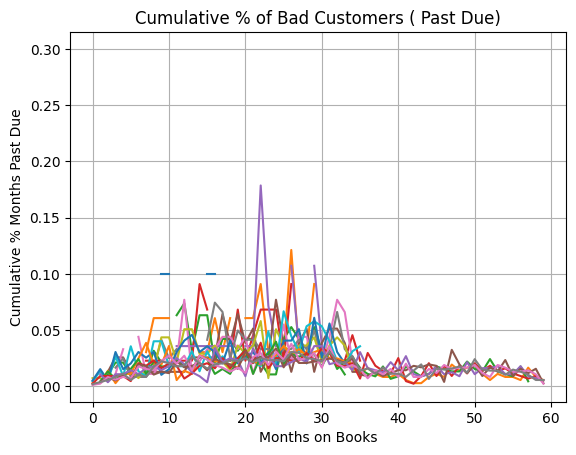

In [25]:
# plot roll rate line chart
plt.rcParams['figure.facecolor'] = 'white'
vintage0 = roll_rates.replace(0,np.nan)
lst = [i for i in range(0,60)]
roll_rates[lst].T.plot(legend = False, grid = True, title = 'Cumulative % of Bad Customers ( Past Due)')
plt.xlabel('Months on Books')
plt.ylabel('Cumulative % Months Past Due')